# Initialize attributes


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

# Feature Engineering

In [ ]:
# Check the columns that might be invalid
indexAge = df[ (df['age'] < 0) & (df['age'] > 100) | (df['bmi'] < 1) ].index
df.drop(indexAge , inplace=True)

In [ ]:
# Checking the null value of coluumns. bmi and smoking status have NAN values.
print(df['sex'].isna().sum())
print(df['age'].isna().sum())
print(df['children'].isna().sum())
print(df['smoker'].isna().sum())
print(df['region'].isna().sum())
print(df['bmi'].isna().sum())
print(df['charges'].isna().sum())

0
0
0
0
0
0
0


In [ ]:
# Change the qualitatives value to quantitatives value.
df["sex"] = df["sex"].map({'male': int(1), 'female': int(0)})
df["smoker"] = df["smoker"].map({'yes': 1, 'no': 0})

In [ ]:
# Use one hot encoder
ohe =OneHotEncoder()
feature_array = ohe.fit_transform(df[["region"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels
features = pd.DataFrame(feature_array, columns = feature_labels)
new_df = pd.concat([df, features], axis=1)
new_df =new_df.drop(['region'], axis=1)
df = new_df

In [ ]:
# Normalize the "bmi" column
scaler = MinMaxScaler()
df['bmi'] = scaler.fit_transform(df[["bmi"]])

In [ ]:
# Change the age from age to labels
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-100']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)

# Use one hot encoder
ohe =OneHotEncoder()
feature_array = ohe.fit_transform(df[["age"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels
features = pd.DataFrame(feature_array, columns = feature_labels)
new_df = pd.concat([df, features], axis=1)
new_df =new_df.drop(['age'], axis=1)
df = new_df

In [ ]:
# Change the order of df for simple access to "charges" column
new_order = [col for col in df.columns if col != "charges"] + ["charges"]
df = df[new_order]

In [ ]:
df.head()

,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,0-20,21-30,31-40,41-50,51-60,61-100,charges
0,0,0.321227,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,16884.92400
1,1,0.479150,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1725.55230
2,1,0.458434,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4449.46200
3,1,0.181464,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21984.47061
4,1,0.347592,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3866.85520


# train test split


In [ ]:
# Set x and y values
x =df.iloc[:,:14]
y =df.iloc[:,-1]

In [ ]:
# Split train/test values
def split_data(size):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size)
    return X_train, X_test, y_train, y_test

# Linear Regrassion

In [ ]:
def init_w_b():
  w = np.random.sample(x.shape[1]) * 100
  b = 0.0
  print(f"Init value for w: {w}")
  print(f"Init value for b: {b}")
  return w, b

In [ ]:
# Calculating the cost function with w and b, the function: f_w,b(x) = wx + b, the J function: j(x) = 1/2m * Σ(f_w,b(x) - y[i])^2
def calculate_cost(x, y, w, b):
  m = x.shape[1]
  f_wb = np.dot(x, w) + b
  return np.sum((f_wb - y)**2) / (2 * m)

In [ ]:
# Calculating the dj_dw(j(x)) and dj_db(j(x)) for w and b
def gradient_descent(x, y, w, b):
  m = x.shape[1]
  predict = np.dot(x, w) + b
  dw = np.dot((predict - y), x) / m
  db = np.sum(predict-y) / m
  return dw, db

In [ ]:
# This function use for finding the best value for w and b in some iterations
loss_list = []
for i in range(1,5):
    w, b = init_w_b()
    X_train, X_test, y_train, y_test = split_data((i*0.2))

    calculate_cost(X_train, y_train, w, b)

    alpha = 0.001
    loss_his = []
    for _ in range(1000):
      loss_his.append(calculate_cost(X_train, y_train, w, b))
      dj_dw, dj_db = gradient_descent(X_train, y_train, w, b)
      w -= alpha * dj_dw
      b -= alpha * dj_db
    loss_list.append(loss_his)
    print(calculate_cost(X_train, y_train, w, b))
    print("----------------------------------------")

Init value for w: [35.39726803 75.31441946 82.41024226  6.25484476 20.83435866 12.83016897
 71.30375559 62.25304238 32.04719288 83.81436722 92.04363264 97.02668268
 76.63437178 69.02607934]
Init value for b: 0.0
1398804934.5340478
----------------------------------------
Init value for w: [23.37526548 86.3249419   0.64067693 92.81039201 57.71501002 32.78162374
 39.17151054 92.67088435 34.03175105 68.00984322 18.54712022 76.94436816
  1.88931328 54.88664541]
Init value for b: 0.0
1066383877.4074222
----------------------------------------
Init value for w: [85.10769054 97.32973508 60.99562164 54.97406192 74.7812152  34.86282092
 69.93039046 68.98568955 98.23442175 77.28558133 50.41625399 97.76837537
 91.88608115 93.79824138]
Init value for b: 0.0
643831186.5806456
----------------------------------------
Init value for w: [70.74194761 75.99011285 76.00355623 90.8455996  60.57255006 82.9586557
 52.29707516  1.84762098 30.93350447 72.54448558 19.90671849  1.73651475
 28.20235144 55.265958

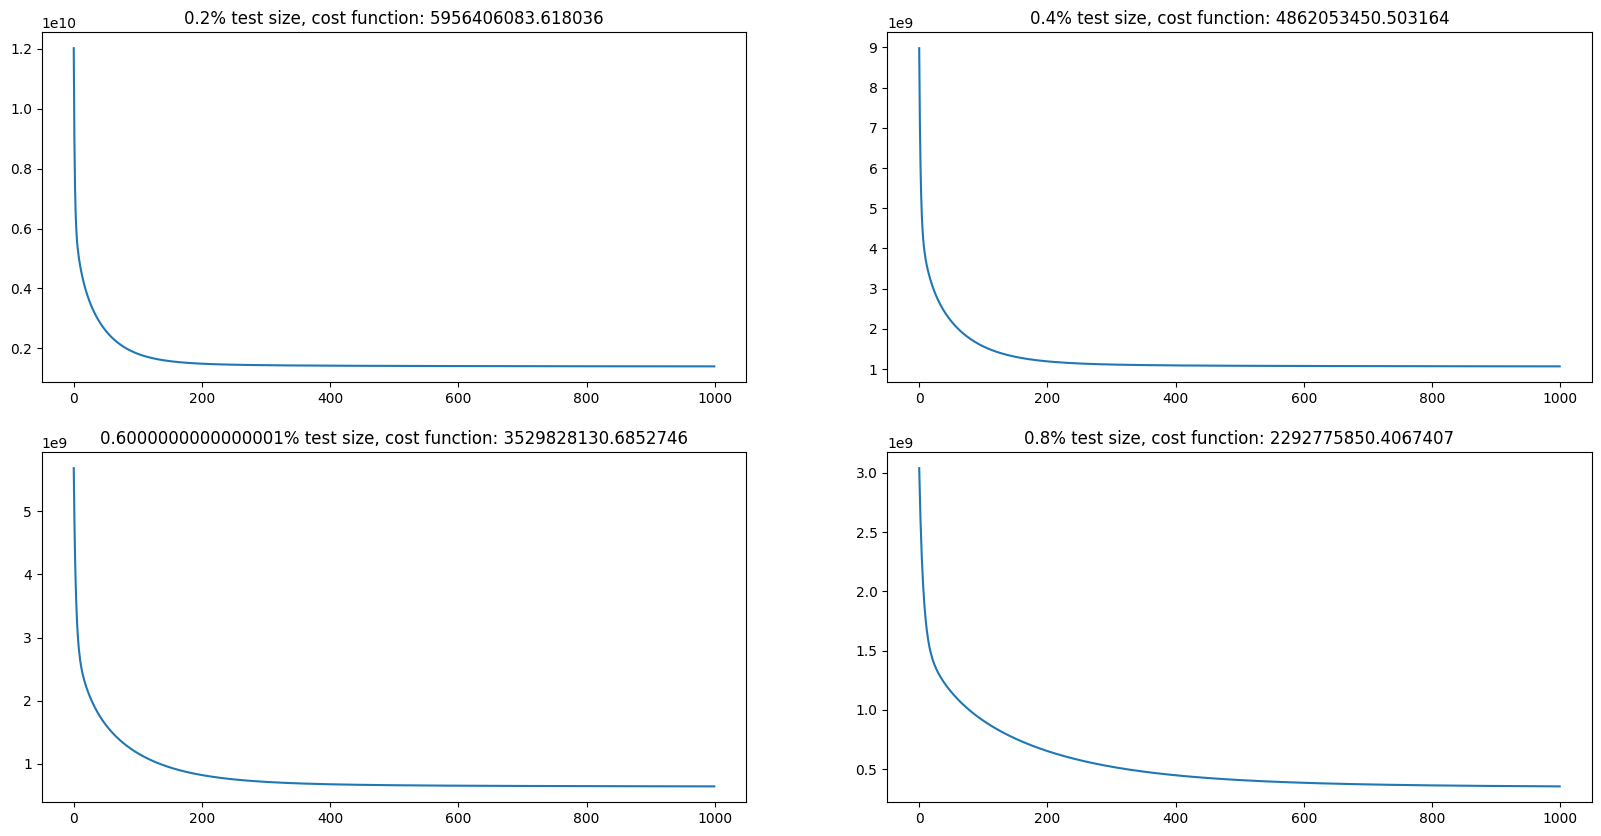

In [ ]:
plt.figure(figsize=(20, 10))
size = 0.2
for i in range(len(loss_list)):
  plt.subplot(2, 2, i+1)
  plt.title(f"{size * (i+1)}% test size, cost function: {loss_list[i][len(loss_list)]}")
  plt.plot(range(1000), loss_list[i])

In [ ]:
# Calculate R-squared Error
predict = np.dot(X_test, w) + b
r_squared = r2_score(y_test, predict)
print('R-squared:', r_squared)

# Calculate mean squared error
mse = mean_squared_error(y_test, predict)
print('Mean Squared Error:', mse)

R-squared: 0.7218180398237984
Mean Squared Error: 40196587.19200272


# Polynomial Regrassion




In [ ]:
# Add X^2 column to the dataset
df['BMI_poly'] = df["bmi"]*df["bmi"]

<ipython-input-31-16e73e79467e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_poly'] = df["bmi"]*df["bmi"]


In [ ]:
# Change the order of df for simple access to "charges" column
new_order = [col for col in df.columns if col != "charges"] + ["charges"]
df = df[new_order]

In [ ]:
df

,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,0-20,21-30,31-40,41-50,51-60,61-100,BMI_poly,charges
0,0,0.321227,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.103187,16884.92400
1,1,0.479150,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.229585,1725.55230
2,1,0.458434,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.210162,4449.46200
3,1,0.181464,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.032929,21984.47061
4,1,0.347592,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.120820,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,0.403820,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.163071,10600.54830
1334,0,0.429379,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.184366,2205.98080
1335,0,0.562012,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.315858,1629.83350
1336,0,0.264730,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.070082,2007.94500


In [ ]:
# Set x and y values
x =df.iloc[:,:15]
y =df.iloc[:,-1]

In [ ]:
# This function use for finding the best value for w and b in some iterations
loss_list = []
for i in range(1,5):
    w, b = init_w_b()
    X_train, X_test, y_train, y_test = split_data((i*0.2))

    calculate_cost(x, y, w, b)

    alpha = 0.001
    loss_his = []
    for _ in range(1000):
      loss_his.append(calculate_cost(x, y, w, b))
      dj_dw, dj_db = gradient_descent(x, y, w, b)
      w -= alpha * dj_dw
      b -= alpha * dj_db
    loss_list.append(loss_his)
    print(calculate_cost(x, y, w, b))
    print("----------------------------------------")

Init value for w: [76.10026095 35.27779164 15.99996685 68.95316337  8.47440191 87.69373202
 78.1655621  50.61756418 73.36261928 15.38862065 79.76930162 64.34279569
 72.76131515 85.72500934 87.71149558]
Init value for b: 0.0
1638416823.214482
----------------------------------------
Init value for w: [ 5.66226952 43.2768295   0.18031272 19.97114569 82.70673615 20.41161106
 94.65713944 57.65347219 12.12476445 95.36617209 67.13170937 71.18438616
 77.17992868  2.35429004  0.80110828]
Init value for b: 0.0
1638324400.0199168
----------------------------------------
Init value for w: [49.30426195  7.46726419 20.60458631 60.92244175 89.2935058   7.76383012
 48.86803699  8.55559447 31.07059273 84.16178445 42.93009451 22.39671169
 75.10016923 93.41012715 56.57287743]
Init value for b: 0.0
1638407319.783051
----------------------------------------
Init value for w: [11.38384902 21.02213634 12.36638368 15.34887461 88.17817854 28.19528724
 80.03137866 31.17166631 11.31077667 53.34291001 55.8512048

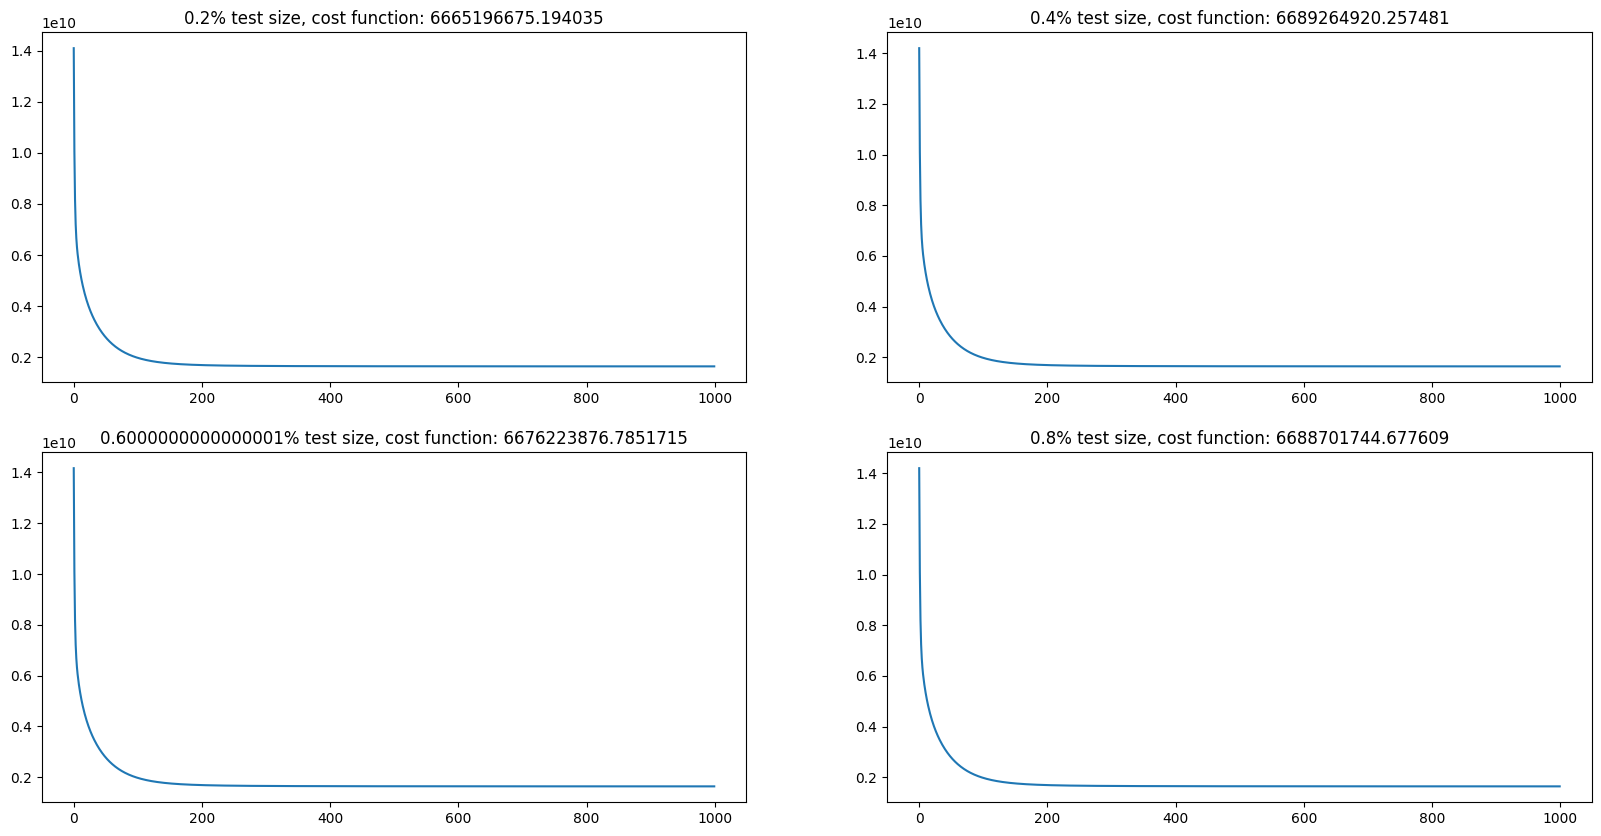

In [ ]:
# Plot the iterations with different test sizes
plt.figure(figsize=(20, 10))
size = 0.2
for i in range(len(loss_list)):
  plt.subplot(2, 2, i+1)
  plt.title(f"{size * (i+1)}% test size, cost function: {loss_list[i][len(loss_list)]}")
  plt.plot(range(1000), loss_list[i])

In [ ]:
# Calculate R-squared Error
predict = np.dot(X_test, w) + b
r_squared = r2_score(y_test, predict)
print('R-squared:', r_squared)

# Calculate mean squared error
mse = mean_squared_error(y_test, predict)
print('Mean Squared Error:', mse)

R-squared: 0.7480474535701298
Mean Squared Error: 37373871.99739941
